# Práctica 2: Aprendizaje automático

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de __2 notebooks__ que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Nombres de los estudiantes: Carmen Miguel Spínola y Miguel Ángel Molina de la Rosa__

### <span style="font-family: 'Verdana'; font-size: 38px; font-weight: bold;">Apartado 1: Clustering</span>

### <span style="font-family: 'Verdana'; font-size: 35px; font-weight: bold;">1) Carga del conjunto de datos</span>

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  - `home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length_n` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [2]:
import pandas as pd

# Crear el dataframe
df = pd.read_csv("prestamos.csv")

# Indicar que las variables son categóricas
df["purpose"] = df["purpose"].astype("category")
df["home_ownership_n"] = df["home_ownership_n"].astype("category")
df["emp_length_n"] = df["emp_length_n"].astype("category")
df["Default"] = df["Default"].astype("category")

Se ha creado en dataframe a partir del conjunto de datos dado (`prestamos.csv`) y se han establecido ciertas variables como categóricas: `purpose`, `home_ownership_n`, `emp_length_n` y `Default`.

### <span style="font-family: 'Verdana'; font-size: 35px; font-weight: bold;">2) Análisis de los datos</span>

### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">2.1) Numéricos</span>

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">2.1.2) Análisis por variable</span>

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Estadística descriptiva</span>: Para cada variable numérica se calcula la media, la desviación típica, el número de datos no nulos, el mínimo, el máximo y ciertos percentiles.

In [3]:
print(df.describe()) # descriptiva: media, cuenta de valores no nulos, desviacion, minimo, maximo, percentiles, mediana
pd.options.display.float_format = '{:.2f}'.format #solo dos decimales para evitar notacion cientifica

          loan_amnt       revenue         dti_n        fico_n
count  13794.000000  1.379400e+04  13794.000000  13794.000000
mean   14507.833116  7.973730e+04     18.825106    699.106822
std     9037.938271  5.646358e+04      9.795986     32.825754
min     1000.000000  7.000000e+03      0.000000    662.000000
25%     7300.000000  4.800000e+04     12.200000    672.000000
50%    12000.000000  6.800000e+04     18.085000    692.000000
75%    20000.000000  9.700000e+04     24.757500    717.000000
max    40000.000000  1.650000e+06    190.870000    847.500000


- `loan_amnt`: Representa la cantidad de dinero solicitada. 
Se ve un rango de datos muy amplio marcado por el mínimo y el máximo (entre 1000 y 40000 dólares). Dentro de este rango, la mayoría de datos se concentran entre los 1000 y los 20000 dólares, como nos indica el percentil 75, por lo que hay una mayor presencia de valores menores. Esto se ve reflejado también en la media, de 14507.83 dólares, un valor algo bajo teniendo en cuenta el máximo posible y que además es muy cercano al percentil 50 (la mediana), lo que sugiere que la mayoría de los préstamos se agrupan alrededor de este valor.
Todo esto lleva a pensar que hay una diferencia notable entre el máximo y la mayoría de valores. Esto podría indicar que hay algunos préstamos de alto valor que no son representativos de la mayoría: una posible presencia de valores atípicos. Esta hipótesis se corroborá con la desviación típica que es muy elevada.

- `revenue`: Son los ingresos anuales de quien solicitó el préstamo.
El rango es aún más amplio que en la variable anterior, los valores se distribuyen entre los 7000 y 1650000 dólares por lo que resultan importantes los percentiles para ver el comportamiento de la distribución. Se ve un grueso bastante compacto entre el percentil 25 y el 75 donde se agrupan la mitad de los datos y tenemos valores de entre 48000 y 97000 dólares. En este caso los valores atípicos se presentan tanto a la alta como a la baja: desde el mínimo hasta el 25% se tiene un rango muy amplio de valores para solo concentrarse el 25% de los datos. De igual manera, desde el 75% hasta el valor máximo se tiene un rango enorme para tener solo un cuarto de los datos. Este último rango es aún más amplio lo que provoca un desjuste entre la media y la mediana: la media será más grande por la presencia de valores númericos realmente altos en la parte final de la muestra.
En conclusión, la mayoría de los solicitantes tienen ingresos dentro de un rango relativamente estrecho aunque existen ciertos individuos con ingresos muy altos que podrían estar afectando la distribución general. Esto se observa también en el valor de la desviación típica: se tiene una desviación muy elevada lo que sustenta las hipótesis anteriores.

- `dti_n`: Porcentaje de endeudamiento sobre los ingresos anuales.
Se tiene un rango más concentrado con respecto a las variables estudiadas anteriormente, lo cual es también provocado por la naturaleza de la variable: al ser un porcentaje su rango tenderá a ser más estrecho que el de una variable numérica. La mitad de los datos se concentran entre 12.20 y 24.76, sin embargo, la dispersión se dispara en el último cuarto donde se tiene un rango enorme, respecto a la distribución de la mayoría de valores para la variable, para representar únicamente un 25% de la muestra. Puede haber valores muy dispersos entre estos últimos valores.
A pesar de esto último, la media es prácticamente igual que la mediana lo que sugiere que el máximo se trata de un valor único en la muestra y que ese último 25% tiende más al valor del percentil 75 que al valor máximo. 
Todo esto está en consonancia con la desviación típica obtenida, la cual es bastante pequeña con respecto a las variables anteriores.

- `fico_n`: Indicador de la solvencia del solicitante para el que se establecen unos rangos.
Se tiene un rango manejable en el que se puede hacer un análisis respecto a los rangos orientativos propuestos en el enunciado. En primer lugar, no hay ningún solicitante considerado pobre ya que el rango de valores empieza con el mínimo en 662. La mayor parte de los solicitantes tienen un buen crédito como reflejan el percentil 25 y 75. Se observa un valor máximo que salta de categoría con lo que se considera un excelente crédito y se observa que es posible que se hay valores muy dispersos o atípicos en el último cuarto de muestra: presenta un mayor rango de valores que el que representa el resto de la muestra (min: 662 a 75%: 717).
Se ve una vairación entre la media y la mediana por la última hipótesis, lo cual se ve respaldado por la desviación típica que, aunque no es muy grande, si indica una cierta dispersión de los datos.

Sobre una muestra de 13794 se observa que ninguna variable presenta ningún valor nulo.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Distribuciones</span>

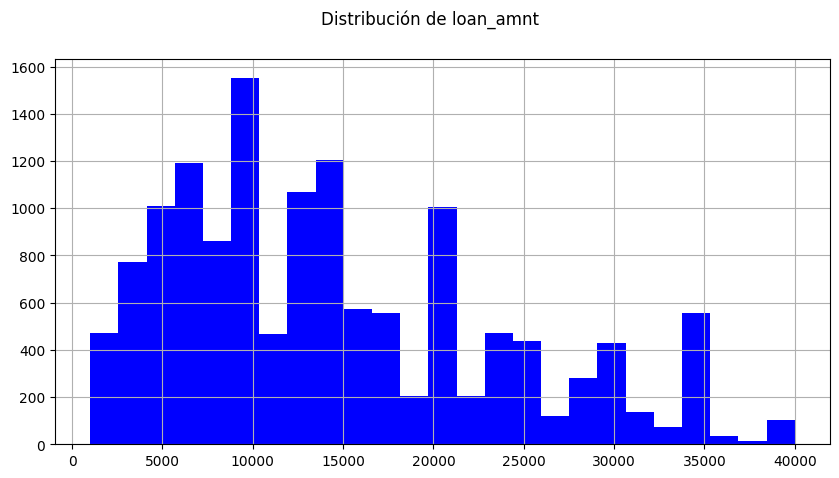

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df["loan_amnt"].hist(figsize=(10, 5), bins=25, color="blue") #histograma con la distribucion
plt.suptitle("Distribución de loan_amnt")
plt.show()

Se observa la presencia de valores atípicos de cantidad de dinero elevada a partir de los 20000 dólares que marca el fin del grueso de los datos. Encaja con las hipótesis anteriores hechas con la estadística descriptiva.

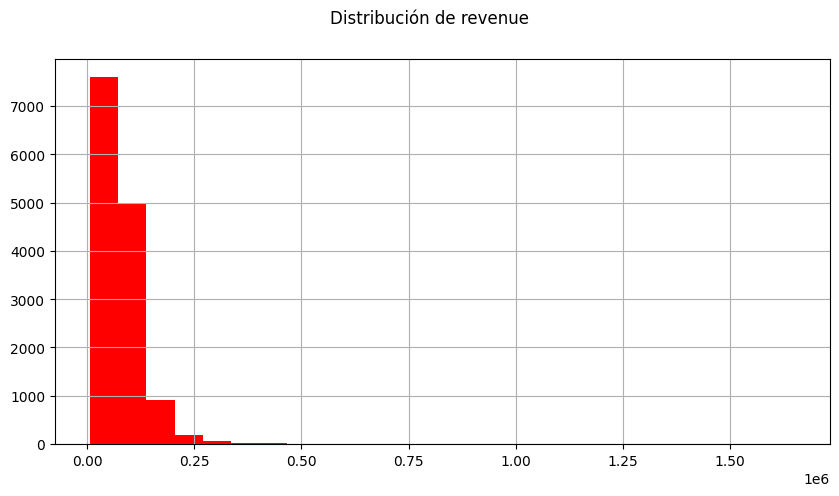

In [5]:
df["revenue"].hist(figsize=(10, 5), bins=25, color="red") #histograma con la distribucion
plt.suptitle("Distribución de revenue")
plt.show()

Como se explicó anteriomente el rango de los valores para esta variable es muy amplio y sin embargo la mayoría de estos se concentran en una pequeña zona de la gráfica. Para verlo aún más claro se ha usado un digrama de cajas y bigotes:

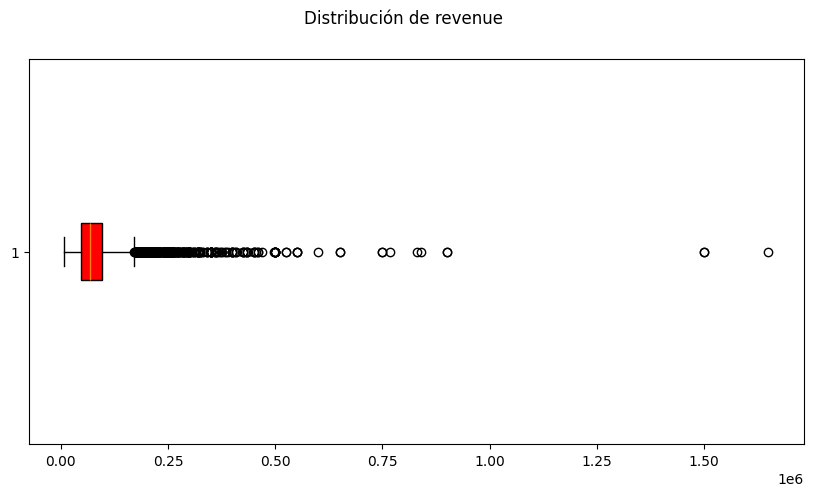

In [6]:
plt.figure(figsize=(10, 5))
plt.boxplot(df["revenue"], vert=False, patch_artist=True, boxprops=dict(facecolor="red"))
plt.suptitle("Distribución de revenue")
plt.show()

Se observa que los datos se concentran en torno a la mediana y que hay una gran presencia de valores atípicos de valor muy elevado que provocan la gran dispersión que presenta la muestra.

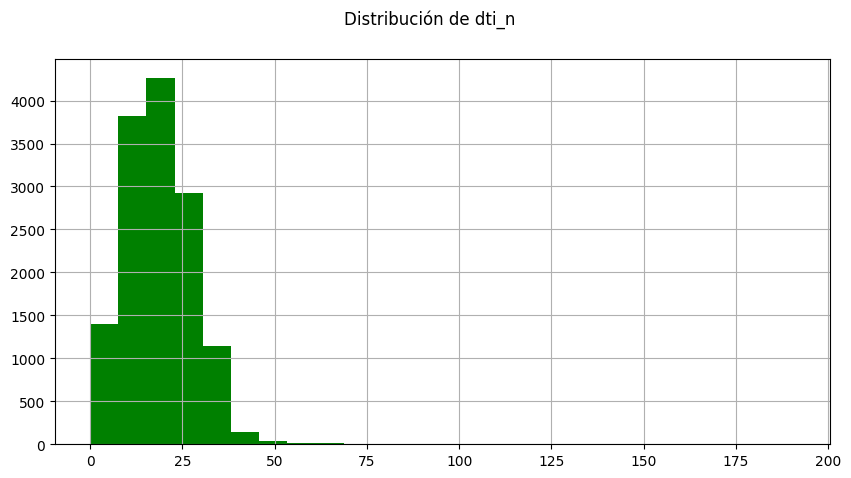

In [7]:
df["dti_n"].hist(figsize=(10, 5), bins=25, color="green") #histograma con la distribucion
plt.suptitle("Distribución de dti_n")
plt.show()

Se ve una distribución muy similar a la anterior aunque con un rango más reducido. Vuelve a haber una gran presencia de valores atípicos hacia valores más grandes en el eje x. De nuevo, se usa un diagrama de cajas y bigotes para evidenciar más estos valores.

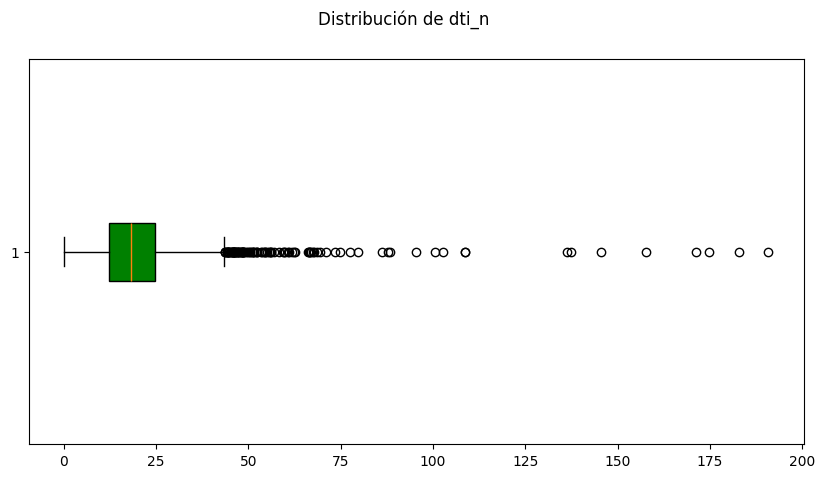

In [8]:
plt.figure(figsize=(10, 5))
plt.boxplot(df["dti_n"], vert=False, patch_artist=True, boxprops=dict(facecolor="green"))
plt.suptitle("Distribución de dti_n")
plt.show()

Se ve como a pesar de que los datos se distribuyen a priori en un rango muy amplio, la mayoría de los datos se concentran en unos valores específicos y la desviación es elevada por la gran presencia de outliners hacia valores grandes de la variable.

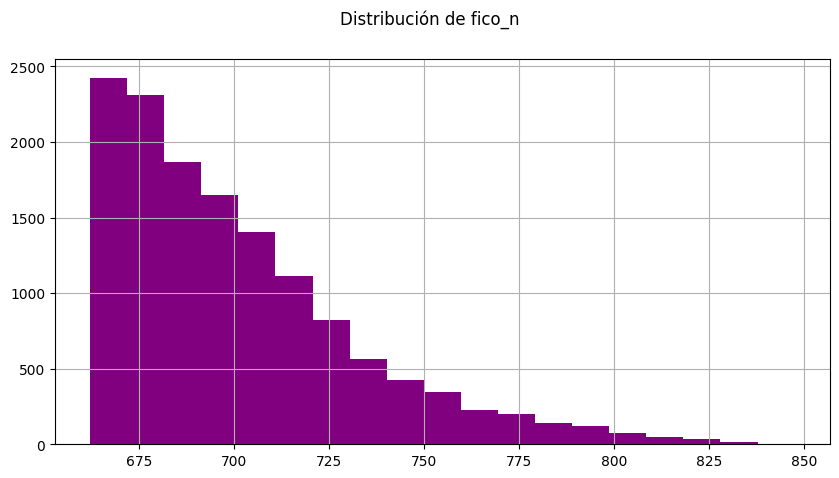

In [9]:
df["fico_n"].hist(figsize=(10, 5), bins=19, color="purple") #histograma con la distribucion
plt.suptitle("Distribución de fico_n")
plt.show()

Se muestra que la variable evoluciona desde una gran cantidad de muestras en torno a valores más pequeños y estas se van reduciendo a medida que aumentan. Se ve como la mayoría de valores se agrupan en torno a la media y hay algunos valores atípicos hacia el final del eje x.

### <span style="font-family: 'Verdana'; font-size: 25px; font-weight: bold;">2.1.2) Análisis entre pares de variables</span>

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Diagramas de dispersión</span>

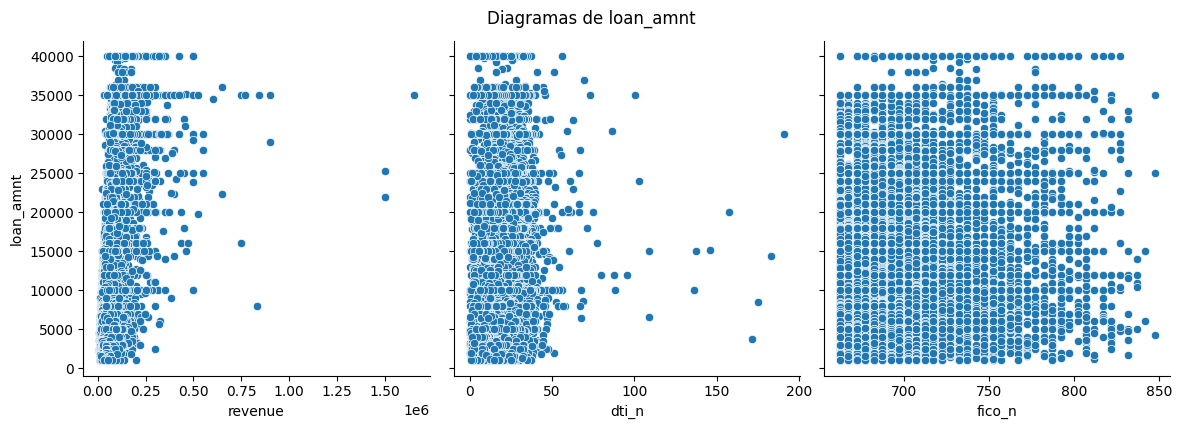

In [10]:
# Correlaciones con loan_amnt
sns.pairplot(df, y_vars=["loan_amnt"], x_vars=["revenue", "dti_n", "fico_n"], height=4)
plt.suptitle("Diagramas de loan_amnt", y=1.05)
plt.show()

- `loan_amnt - revenue`: A primera vista, se observa que la mayoría de los valores de revenue están agrupados en rangos bajos mientras que loan_amnt tiene una distribución más amplia. En cuanto a la relación entre variables, se puede ver como hay una cierta tendencia ascendente con respecto al eje y que tiene cierta lógica con el hecho de que aquellas personas que solicitan un préstamo de un valor más pequeño son quienes tienen menos ingresos anuales y ese rango de ingresos anuales se va ensanchando a medida que aumenta el dinero solicitado.

- `loan_amnt - dti_n`: Tampoco se observa ninguna relación clara entre ambas variables.

- `loan_amnt - fico_n`: Se observa un patrón más estructurado y las muestras ocupan todo el rango del gráfico aunque no se ve ninguna correlación.

Se observa cierta correlación, aunque con cierta variabilidad, de loan_amnt con revenue. No se puede decir lo mismo de las otras variables. En todas las gráficas, se perciben ciertos outliners que pueden influir en el análisis de las variables y su correlación.

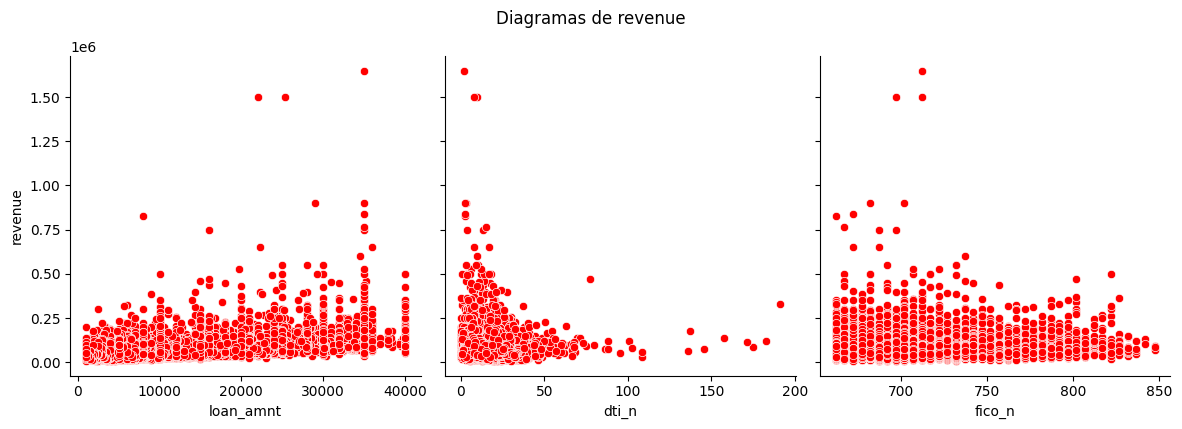

In [11]:
# Correlaciones con revenue
sns.pairplot(df, y_vars=["revenue"], x_vars=["loan_amnt", "dti_n", "fico_n"], height=4, plot_kws={'color': 'red'})
plt.suptitle("Diagramas de revenue", y=1.05)
plt.show()

- `revenue - loan_amnt`: Quizás estableciendo así los ejes se observa mejor esa tendencia creciente que respecto a la anterior gráfica (aunque se relacionan las mismas variables). Esta tendencia no es perfectamente lineal ya que revenue parece tener muchos valores bajos incluso cuando loan_amnt aumenta. Quedan claros los valores atípicos con revenue muy alto (superior a 1 millón).

- `revenue - dti_n`: Se nota una distribución en forma de curva decreciente, lo que sugiere que a medida que dti_n (relación deuda/ingreso) aumenta, revenue (los ingresos anuales) tiende a disminuir. Resulta una hipótesis lógica ya que, en general, altas deudas suelen correlacionar con menores ingresos.

- `revenue - fico_n`: No hay una correlación clara entre estas variables. Si resulta interesante que los valores atípicos de revenue, a pesar de tener ingresos anuales muy altos, no son los individuos con mayor solvencia. 

Se reafirma la relación de revenue con loan_amnt y se descubre cierta correlación de revenue con dti_n.

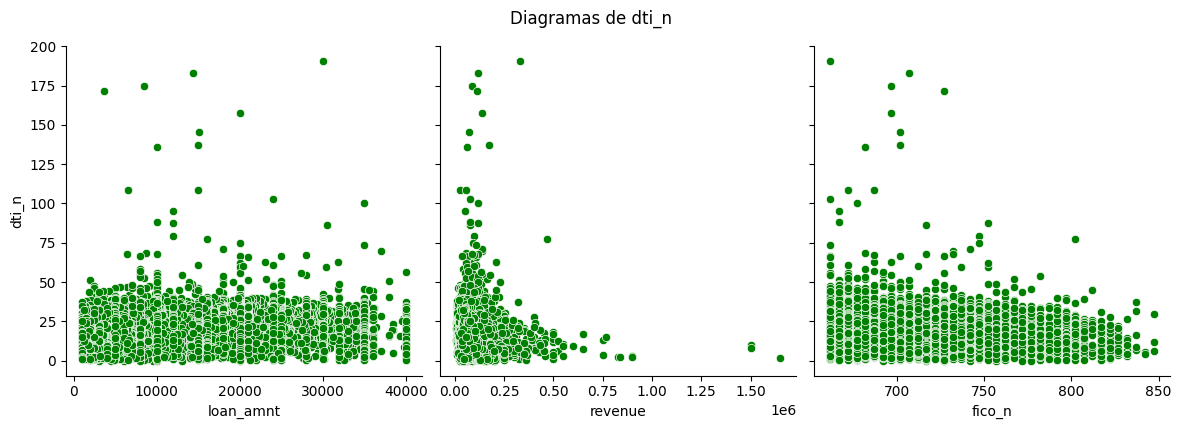

In [12]:
# Correlaciones con dti_n
sns.pairplot(df, y_vars=["dti_n"], x_vars=["loan_amnt", "revenue", "fico_n"], height=4, plot_kws={'color': 'green'})
plt.suptitle("Diagramas de dti_n", y=1.05)
plt.show()

- `dti_n - loan_amnt`: Como se comentó anteriormente no parece haber correlación alguna entre estas variables.

- `dti_n - revenue`: Se observa la curva decreciente de la que se habla en las gráficas de revenue.

- `dti_n - fico_n`: No hay una correlación clara entre estas variables. Si parece haber cierta tendencia decreciente aunque muy leve. Aparecen individuos con alto dti_n (relación deuda/ingreso) a quienes corresponde una solvencia pequeña en general.

Vuelve a aparecer la curva decreciente que forma esta variable con revenue y se se ve la falta de correlación clara de dti_n con fico_n aunque resulta interesante observar el comportamiento de los valores atípicos de dti_n.

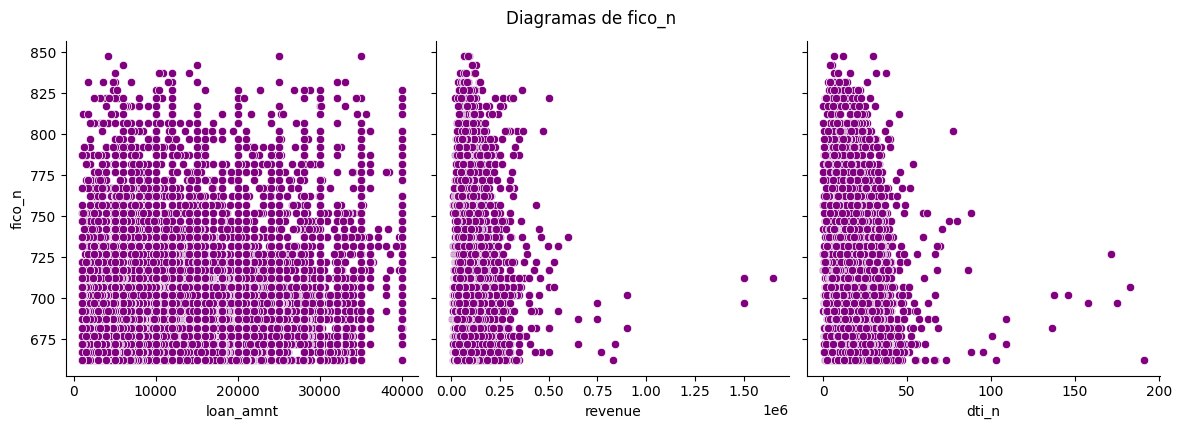

In [13]:
# Correlaciones con fico_n
sns.pairplot(df, y_vars=["fico_n"], x_vars=["loan_amnt", "revenue", "dti_n"], height=4, plot_kws={'color': 'purple'})
plt.suptitle("Diagramas de fico_n", y=1.05)
plt.show()

- `fico_n - loan_amnt`: Como se comentó anteriormente no parece haber correlación alguna entre estas variables.

- `fico_n - revenue`: Tampoco hay una correlación marcada aunque vuelve a verse la tendencia de los valores atípicos de revenue de tener un fico_n bajo.

- `fico_n - dti_n`: Se evidencia su falta de correlación a pesar de la pequeña tendencia observada anteriormente. Vuelve a verse el comportamiento de ciertos outliners: los valores pequeños de fico_n (solvencia) para los valores atípicos de dti_n (relación deuda/ingresos).

Esta variable no parece establecer una correlación con ninguna de las restantes.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Matriz de correlación</span>

Se ha hecho la matriz de correlación que muestra las correlaciones entre las variables. Se ha hecho con el coeficiente de correlación de Pearson entre dos variables, que mide la fuerza y la dirección de la relación lineal entre ellas. 

Para el análisis se sabe que este coeficiente está en un rango entre [-1,1] tal que:

- -1 indica una correlación negativa perfecta: cuando una variable aumenta, la otra disminuye proporcionalmente.
- 0 indica que no hay ninguna relación lineal entre las variables.
- 1 indica una correlación positiva perfecta: cuando una variable aumenta, la otra también lo hace de manera proporcional.

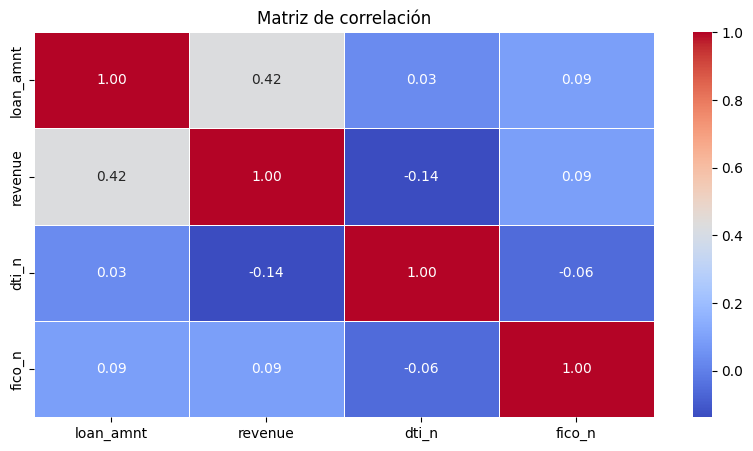

In [14]:
# Matriz de los coeficientes de correlación de Pearson
plt.figure(figsize=(10, 5))
# Se escogen solo la variables numéricas
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

Descartando obviamente la diagonal principal (ya que la correlación de una variable con sí misma es perfecta con un coeficiente de 1), hay ciertas relaciones entre dos variables que muestran un coeficiente interesante:

- `loan_amnt - revenue`: Anteriormente se observó la relación entre estas dos variables en su diagrama de dispersión en la que destacaba la tendencia creciente de este. Esta hipótesis se ve respaldada con el coeficiente de correlación de 0.42 que muestra cierta relación positiva: cuando una de las variables aumenta, la otra también. Desde un punto de vista más superficial puede resultar lógico que los individuos con mayores ingresos puedan aspirar a préstamos más elevados que es precisamente lo que evidencia esta relación.

- `revenue - dti_n`: Como se veía en el diagrama de estas variables, mantenían una relación inversamente proporcional algo débil mendiante esa curva decreciente. Esto se confirma con el coeficiente de -0.14 calculado y resulta lógico pensar que la relación deuda/ingreso aumentará a medida que disminuyen los ingresos.

Quitando las dos relaciones analizadas que parecen más claras, el resto de variables práticamente no presentan correlación: se habló de una pequeña tendencia descendente entre `dti_n y fico` aunque resulta ser aún más débil de lo que parecía (-0.06).

En general, no aparecen coeficientes demasiados altos para relaciones positivas fuertes (o bajos para relaciones negativas) aunque si resulta interesante comprobar que las observaciones previas se confirman con el cálculo del coeficiente. 


### <span style="font-family: 'Verdana'; font-size: 30px; font-weight: bold;">2.1) Categóricos</span>

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Diagramas de frecuencias</span>

Se han obtenido los diagramas de frecuencias tanto absolutas como relativas de cada variable categórica. Aunque, en este caso se sabe el número de individuos de la muestra (13794), se hacen los diagramas de frecuencias relativas para que quede aún más claras la diferencia entre la cantidad de individuos clasificados en un grupo con respecto a la cantidad total de individuos. 

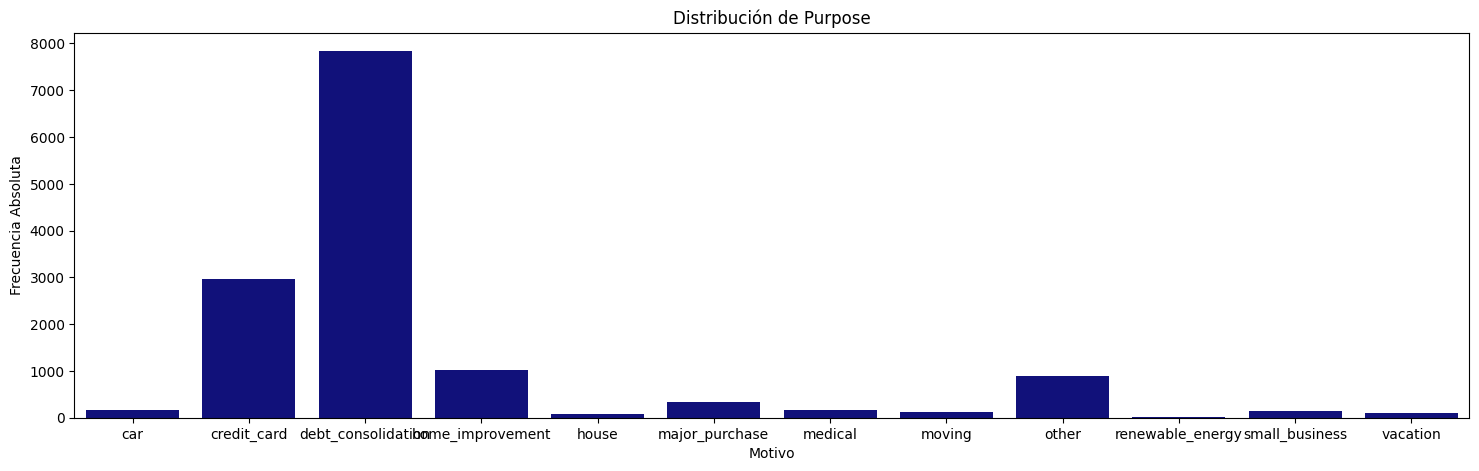

In [15]:
# Diagrama de frecuencias para la variable 'purpose'
plt.figure(figsize=(18, 5))
freq_relativa = df['purpose'].value_counts(normalize=True)
sns.countplot(x='purpose', data=df, color='darkblue')
plt.title('Distribución de Purpose')
plt.xlabel('Motivo')
plt.ylabel('Frecuencia Absoluta')
plt.show()

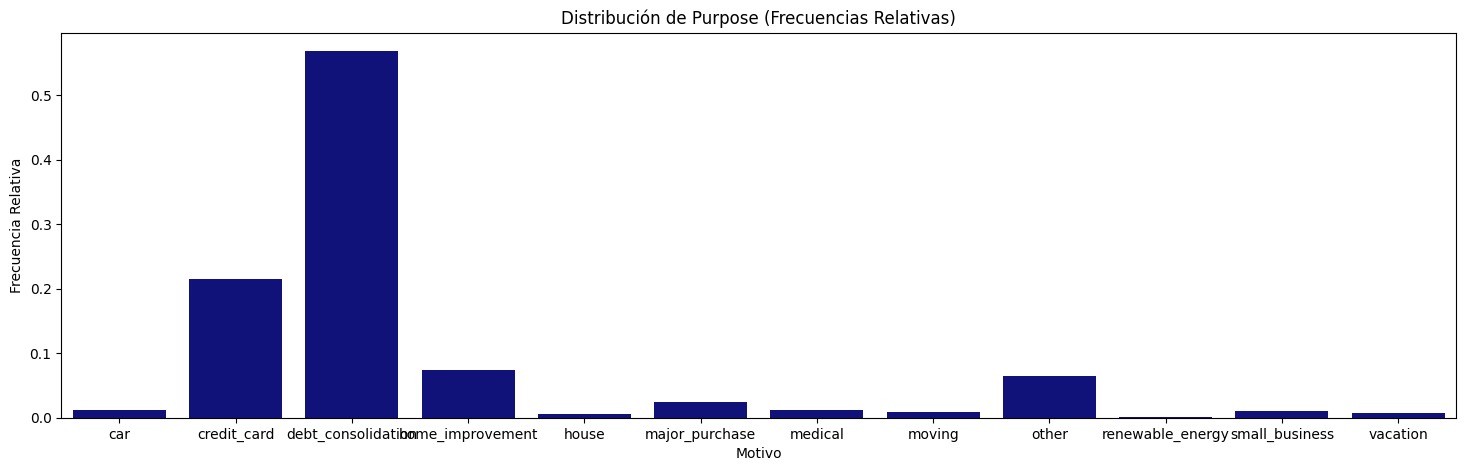

In [16]:
# Diagrama de frecuencias relativas para la variable 'purpose'
# Calcular las frecuencias relativas
freq_relativa = df['purpose'].value_counts(normalize=True)

# Crear el gráfico de barras con las frecuencias relativas
plt.figure(figsize=(18, 5))
sns.barplot(x=freq_relativa.index, y=freq_relativa.values, color='darkblue')

plt.title('Distribución de Purpose (Frecuencias Relativas)')
plt.xlabel('Motivo')
plt.ylabel('Frecuencia Relativa')
plt.show()

`Purpose` es la variable que indica el motivo por el que el individuo pide un préstamo. Se ven varias categorías para esta variable y algunas destacan sobre otras:

- `debt_consolidation`: es la categoría en la que se engloban la mayoría de individuos (hace referencia a un procedimiento financiero de consolidación de deudas) y parece ser el motivo más usado para pedir los préstamos de la muestra. Representa más de la mitad de los individuos como se ve en la distribución con las frecuencias relativas.

- `credit_card`: este motivo reúne a más de una quinta parte del total siendo el segundo que más aparece.

- `home_improvement` - `other`: parecen tener frecuencias muy parecidas y serían el tercer motivo más usado (por una décima parte de los individuos cada uno).

Aparecen muchas otras categorías aunque no son muy usadas en la muestra.

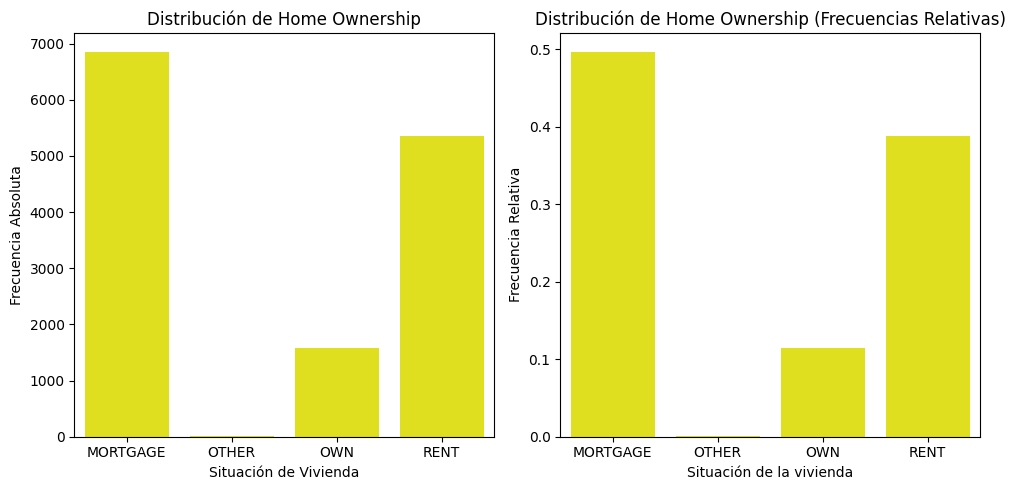

In [17]:
# Crear una figura con dos subgráficas (una fila, dos columnas)
plt.figure(figsize=(10, 5))

# Diagrama de frecuencias absolutas
plt.subplot(1, 2, 1) 
sns.countplot(x='home_ownership_n', data=df, color='yellow')
plt.title('Distribución de Home Ownership')
plt.xlabel('Situación de Vivienda')
plt.ylabel('Frecuencia Absoluta')

# Diagrama de frecuencias relativas
freq_relativa = df['home_ownership_n'].value_counts(normalize=True)
plt.subplot(1, 2, 2)  
sns.barplot(x=freq_relativa.index, y=freq_relativa.values, color='yellow')
plt.title('Distribución de Home Ownership (Frecuencias Relativas)')
plt.xlabel('Situación de la vivienda')
plt.ylabel('Frecuencia Relativa')

plt.tight_layout()  
plt.show()

In [18]:
# Contar las ocurrencias de "other" en la variable 'home_ownership'
cnt = df['home_ownership_n'].value_counts().get('OTHER', 0)
print(f'Cantidad de valores "OTHER": {cnt}')

Cantidad de valores "OTHER": 9


`Home Ownership` es la variable que indica la situación de la vivienda en la que vive el solicitante del préstamo y aparecen en el eje las cuatro categorías que se mostraban en el enunciado:

- `mortgage`: es la categoría que destaca sobre las demás y hace referencia a que el solicitante vive en una vivienda de la que está pagando la hipoteca. Como vemos en las frecuencias relativas alrededor de la mitad de los individuos de la muestra se engloban en esta categoría.

- `rent`: se muestra como un 40% de la muestra viven en una vivienda de alquiler. Es entonces la segunda categoría más repetida.

- `own`: indica que el solicitante vive en una casa totalmente de su propiedad. Tiene una frecuencia más baja con respecto a las anteriores y agrupa a más de una décima parte de la muestra.

- `other`: no hay apenas individuos que vivan en otras circunstancias quitando las mencionadas. Se ve como se encuentran únicamente 9 apariciones de other en la columna de la variable estudiada que resulta un valor muy bajo teniendo en cuenta el total. 

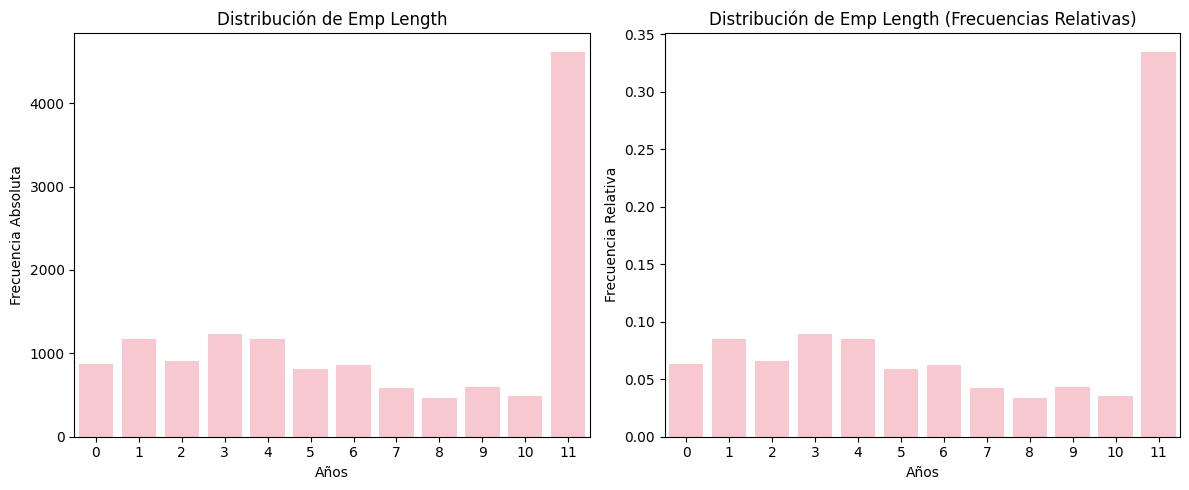

In [19]:
# Crear una figura con dos subgráficas (una fila, dos columnas)
plt.figure(figsize=(12, 5))

# Diagrama de frecuencias absolutas
plt.subplot(1, 2, 1) 
sns.countplot(x='emp_length_n', data=df, color="pink")
plt.title('Distribución de Emp Length')
plt.xlabel('Años')
plt.ylabel('Frecuencia Absoluta')

# Diagrama de frecuencias relativas
freq_relativa = df['emp_length_n'].value_counts(normalize=True)
plt.subplot(1, 2, 2)  
sns.barplot(x=freq_relativa.index, y=freq_relativa.values, color='pink')
plt.title('Distribución de Emp Length (Frecuencias Relativas)')
plt.xlabel('Años')
plt.ylabel('Frecuencia Relativa')

plt.tight_layout()  
plt.show()

`Emp Length` expresa los años de permanencia donde 0 indica que no hay información y 11 una permanencia de más de 10 años:

- `11`: es la principal duración que se encuentra en la muestra por lo que la mayoría de individuos tienen una permanencia de más de 10 años. Representa alrededor de un 35% de la muestra.
- `0`: Engloba los préstamos para los que no se tienen datos sobre su duración. Parece una categoría interesante al ser un dato nulo pero no representa ni una décima parte de la muestra.

Para el resto de años los datos se distribuyen de manera más o menos uniforme en un pequeño rango haciendo que los datos restantes, más de la mitad de la muestra, no se engloben en una categoría o rango de años en específico. Esta distribución de los datos puede deberse a que se trata de un dato cambiante en el tiempo y no categorías prefijadas más fuertemente desde el principio del préstamo.

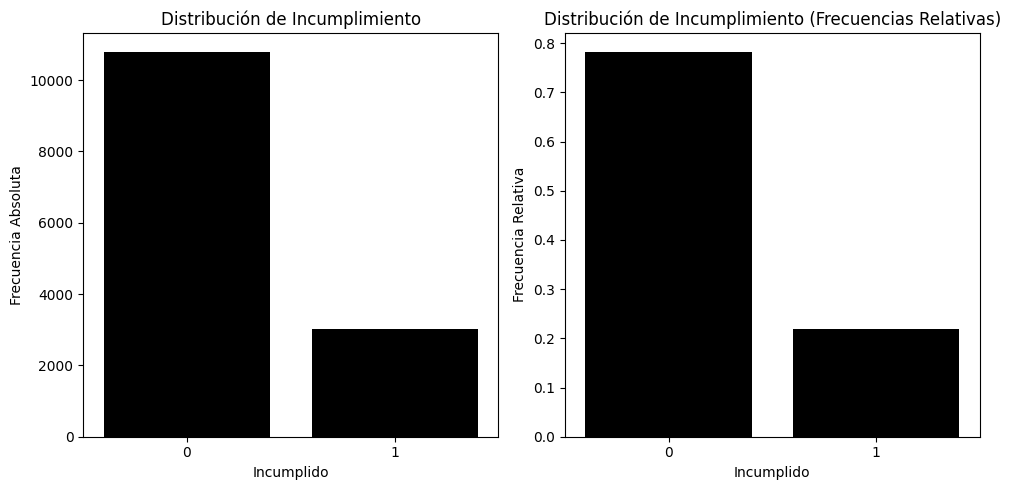

In [20]:
# Crear una figura con dos subgráficas (una fila, dos columnas)
plt.figure(figsize=(10, 5))

# Diagrama de frecuencias absolutas
plt.subplot(1, 2, 1) 
sns.countplot(x='Default', data=df, color="black")
plt.title('Distribución de Incumplimiento')
plt.xlabel('Incumplido')
plt.ylabel('Frecuencia Absoluta')

# Diagrama de frecuencias relativas
freq_relativa = df['Default'].value_counts(normalize=True)
plt.subplot(1, 2, 2)  
sns.barplot(x=freq_relativa.index, y=freq_relativa.values, color='black')
plt.title('Distribución de Incumplimiento (Frecuencias Relativas)')
plt.xlabel('Incumplido')
plt.ylabel('Frecuencia Relativa')

plt.tight_layout()  
plt.show()

`Default` es la variable objetivo de nuestro estudio y representa si un individuo ha incurrido en incumplimiento (default) o no. Es una variable dicotómica por lo que las categorías son:

- `0`: significa que no ha incurrido en default y es la mayoritaria en la muestra. Se aprecia que casi el total de la muestra, alrededor de un 80%, tiene valor 0 para la variable default.
- `1`: al contrario que el valor anterior, significa que se incurre en default y representa algo más de un 20& en contraposición con el valor anterior.

En general, se observa que la mayoría de préstamos no han incurrido en default.

### <span style="font-family: 'Verdana'; font-size: 35px; font-weight: bold;">3) Preprocesar los datos</span>

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Puesto que va a usarse el algoritmo k-means más adelante, es necesario cambiar la escala de los datos. Esto es porque, como se ha visto, hay variables con un rango muy amplio y diferente respecto a otras lo que sería un problema para calcular las distancias como lo hace el algoritmo haciendo que los datos no se agrupen de manera óptima.

Se concluye que es necesario normalizar para que el modelo dé la misma importancia a todas las variables.

In [21]:
from sklearn.preprocessing import StandardScaler

# Nuevo dataframe
df_numerico = df[["loan_amnt", "revenue", "dti_n", "fico_n"]]

# se accede al array interno
array = df_numerico.to_numpy()  

# Se escalan los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(array)   

Para llevar a cabo el preprocesado, se ha optado por estandarizar los datos con `StandarScaler`. Esta decisión se debe a que:

- Proporciona la justicia que se buscaba a la hora de comparar las variables con un modelo como k-means basado en distancias.

- Tras el estudio hecho anteriormente sobre las variables, se concluye que hay muchos valores atípicos/outliners lo cual puede influir si se decide reescalar con MinMaxScaler haciendo que se distorsione el rango de las variables. Por esto, estandarizar los datos resulta más útil para el análisis de esta muestra.

### <span style="font-family: 'Verdana'; font-size: 35px; font-weight: bold;">4) Encontrar el número óptimo de clusters</span>

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Diagrama de codo</span>

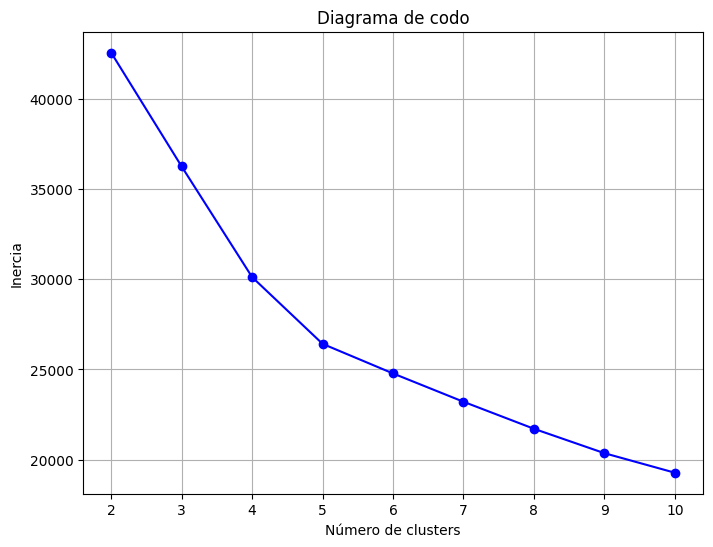

In [22]:
from sklearn.cluster import KMeans

# De 2 a 10 clusters
rango = range(2, 11)
inercia = []

# Se calcula la inercia para cada valor de K
for k in rango:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_escalados)  
    inercia.append(kmeans.inertia_)

# Diagrama de codo
plt.figure(figsize=(8, 6))
plt.plot(rango, inercia, marker='o', color='b')
plt.title('Diagrama de codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.xticks(rango)
plt.grid(True)
plt.show()

El diagrama de codo resulta útil para encontrar el número de clusters óptimo que vendrá dado por el denominado "codo" del diagrama. 

En este caso, el codo se da con 5 clusters de tal manera que a partir de este valor, a medida que se aumenta el número de clusters, el beneficio de añadirlos (dado por la inercia) comienza a disminuir.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Índice davies_bouldin</span>

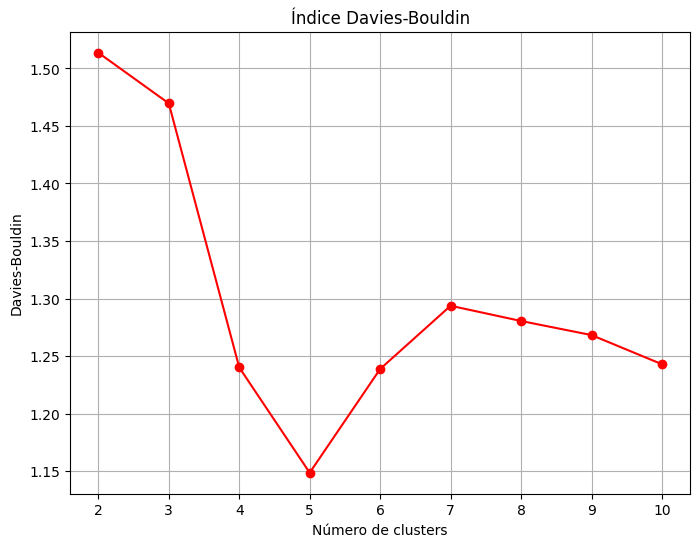

In [23]:
from sklearn.metrics import davies_bouldin_score

# Lista para almacenar los resultados 
davies_bouldin = []

# Se calcula el Davies-Bouldin para cada valor de K
for k in rango:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_escalados)  
    davies_bouldin.append(davies_bouldin_score(datos_escalados, kmeans.labels_))

# Gráfica del índice davies-bouldin
plt.figure(figsize=(8, 6))
plt.plot(rango, davies_bouldin, marker='o', color='r')
plt.title('Índice Davies-Bouldin')
plt.xlabel('Número de clusters')
plt.ylabel('Davies-Bouldin')
plt.xticks(rango)  
plt.grid(True)
plt.show()


El coeficiente davies_bouldin sirve para evaluar como de compactos y separados son los clusters donde un índice bajo indica que, con ese número de clusters, se tienen clusters bastante compactos y suficientemente separados.

Como se busca minimizar el índice, se ve claramente que el punto de la gráfica en el que el coeficiente es más bajo es con 5 clusters, estando entonces en consonancia con lo expresado en el diagrama de codo.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Coeficiente de silhouette</span>

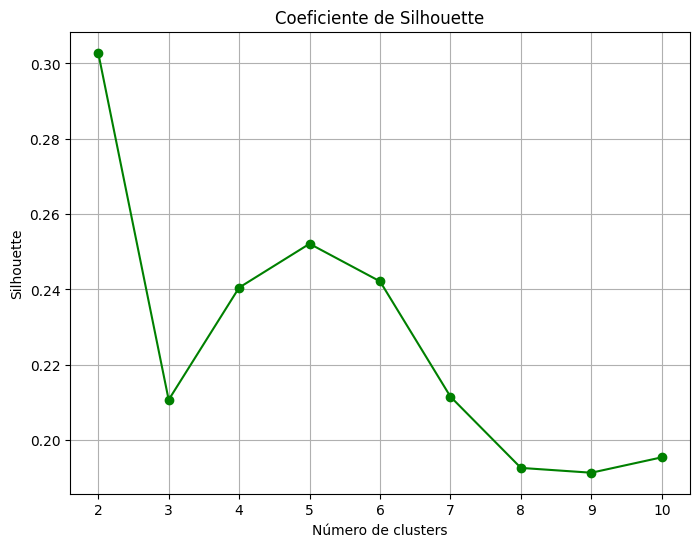

In [24]:
from sklearn.metrics import silhouette_score

# Lista para almacenar los resultados
silhouette = []

# Se calcula el coeficiente de silhouette para cada valor de K
for k in rango:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_escalados)  
    silhouette.append(silhouette_score(datos_escalados, kmeans.labels_))

# Gráfica del coeficiente de silhouette
plt.figure(figsize=(8, 6))
plt.plot(rango, silhouette, marker='o', color='g')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette')
plt.xticks(rango) 
plt.grid(True)
plt.show()

El coeficiente de silhouette mide la similitud de un individuo con el pripio cluster al que pertenece en comparación con el resto. Cuanto más cercano a 1 es el valor de este coeficiente mejor agrupados estarán los datos.

Se busca entonces maximizar el coeficiente: 

- el valor más alto se da con 2 clusters ya que el número de clusters afecta directamente al cálculo del coeficiente haciendo que la separación entre grupos sea mayor por la asignación binaria de los datos en dos grupos muy grandes y muy relevantes. Es por ello que no se considera muy relevante en este caso coger el que, a priori, parece el mejor valor.

- el segundo valor más alto se da con 5 clusters, lo que resulta más acorde con los resultados anteriores.

Se concluye que el número de clusters adecuado es 5. Está dentro del rango dado y es un número de grupos manejable en el análisis posterior.

### <span style="font-family: 'Verdana'; font-size: 35px; font-weight: bold;">5) Descripción de los clusters</span>

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Para la interpretación correcta de los datos</span>

In [25]:
# k-means con el número óptimo de clusters (5)
kmeans = KMeans(n_clusters=5, random_state=42)

# Se asignan las etiquetas al dataframe original
df['cluster'] = kmeans.fit_predict(datos_escalados)  

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Descriptores estadísticos de los clusters</span>

In [26]:
# Se calculan estadísticas descriptivas por cluster
estadisticas = df.groupby('cluster')[['loan_amnt', 'revenue', 'dti_n', 'fico_n']].agg(['mean', 'median', 'std', 'min', 'max'])

# Hcer tabla para visualizar
estadisticas_df = estadisticas.T.reset_index()
estadisticas_df.columns = ['Variable', 'Estadístico'] + [f'Cluster {i}' for i in range(len(estadisticas.columns.levels[1]))]
print(estadisticas_df)


     Variable Estadístico  Cluster 0  Cluster 1  Cluster 2  Cluster 3  \
0   loan_amnt        mean   12866.54    9645.68   11075.23   26319.19   
1   loan_amnt      median   12000.00   10000.00   10000.00   28000.00   
2   loan_amnt         std    7449.90    4766.67    5519.27    8880.43   
3   loan_amnt         min    1000.00    1000.00    1000.00    2500.00   
4   loan_amnt         max   40000.00   25000.00   37000.00   40000.00   
5     revenue        mean   76414.10   67729.75   57209.25  315288.40   
6     revenue      median   70000.00   61000.00   52000.00  260000.00   
7     revenue         std   36045.34   31852.13   25885.17  170301.42   
8     revenue         min    9036.00    8400.00    7000.00  189000.00   
9     revenue         max  225000.00  221000.00  332500.00 1650000.00   
10      dti_n        mean      15.73      12.99      28.95      11.66   
11      dti_n      median      15.47      13.38      27.34      10.36   
12      dti_n         std       7.74       5.02    

Cada cluster representa un grupo de préstamos con características similares. Se estudian los 3 clusters considerados más diferentes entre sí:

- Cluster 0:

    - Cantidad del préstamo aceptable con una mediana de 12,000, con valores en un rango de 1000 y 40000.
    - Los ingresos de los solicitantes rondan 70,000 aunque con bastante variación y dispersión de los datos.
    - En promedio el endeudamiento dado por el dti es bajo.
    - Presentan un fico alto (Media de 757.71, con mínimo de 717 y máximo de 847.5).

Este cluster representaría los préstamos dados a los individuos con ingresos medios, buena solvencia y una deuda bastante controlada.

- Cluster 2:

    - Cantidad del préstamo similar al anterior cluster con una mediana de 10000, con valores entre 1000 y 37000.
    - Los ingresos de quienes solicitan estos préstamos están alrededor de los 52,000 con una alta dispersión en los valores de esta variable.
    - Presentan un endeudamiento (dti) bastante alto con un valor máximo muy elevado que puede tratarse de un valor atípico.
    - A diferencia del cluster anterior, el fico es medio-bajo (689.58 en promedio, con mínimo de 662) por lo que los solicitantes presentan una menor solvencia.

El cluster agrupa a clientes con ingresos más bajos, un alto nivel de deuda y poca solvencia.

- Cluster 3:

    - Cantidades de préstamos más altas con mediana de 28000 y valores entre 2500 y 40000.
    - Ingresos de los solicitantes muy altos si consideramos el resto de clusters, con una mediana de 260000 y un rango de valores que parte desde 189000 con máximo de 1650000.
    - Se tiene un endeudamiento bajo, con media de 11.66 siendo la más baja entre todos los clusters.
    - Presentan un fico alto-medio (712.18 en promedio), pero con una dispersión considerable.

Este cluster engloba los préstamos hechos por clientes con ingresos altos y préstamos elevados, con una deuda controlada. 

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Predicción de default de los clusters estudiados</span>

Por el análisis anterior, se llega a una primera hipótesis en cada cluster:

- Cluster 0: Es quizás el grupo que más parece poder incurrir en default por los ingresos relativamente bajos y el fico bajo.

- Cluster 2: A priori, los solicitantes parecen tener unos ingresos acpetables y una deuda bastante controlado como para incurrir en default.

- Cluster 3: Los clientes de los préstamos aquí agrupados parecen tener unos ingresos muy altos y un endeudamiento bajo, por lo que no parece que vayan a incurrir en default.

Estas primeras ideas, se deben corroborar con el cálculo de la proporción de default por cada uno de los clusters.

In [27]:
# Convertir default a tipo numérico
df['Default'] = df['Default'].astype(int)

# Se calcula la proporción de defaults por cluster
proporcion = df.groupby('cluster')['Default'].mean()
print(proporcion)


cluster
0   0.11
1   0.19
2   0.30
3   0.17
4   0.25
Name: Default, dtype: float64


Tal y como se intuía en un principio, el cluster 2 presenta la mayor proporción de default. El cluster 0 sería el grupo de préstamos que menos incurre en default y el cluster 3 presenta el segundo valor más bajo de proporcion de default.

Las hipótesis iniciales basadas en el análisis de la estadística descriptiva por cluster han acertado en la predicción.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Diagramas de dispersión</span>

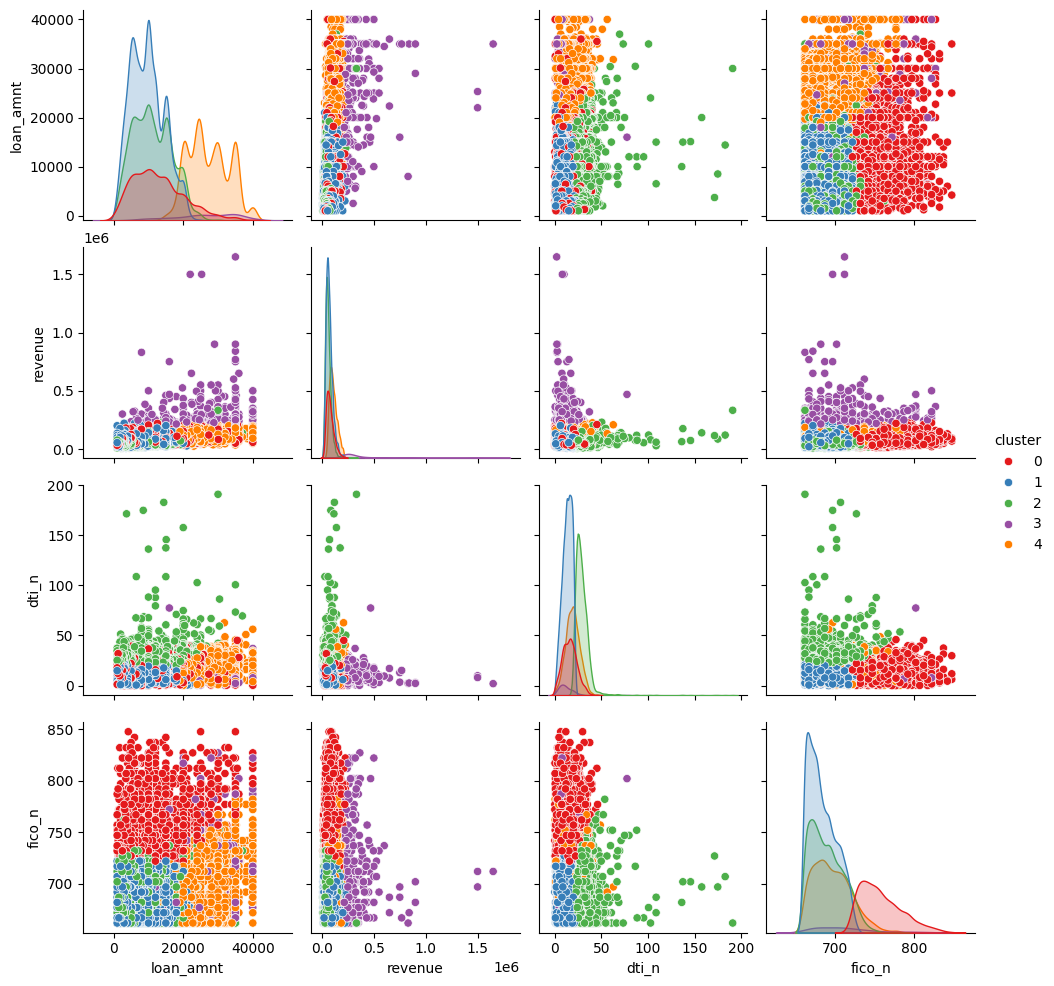

In [28]:
# Crear Pairplot con hue en función del cluster
sns.pairplot(df, vars=['loan_amnt', 'revenue', 'dti_n', 'fico_n'], hue='cluster', palette='Set1')

# Mostrar la gráfica
plt.show()

Debido a la alta presencia de outliners, las gráficas quedan con un rango muy amplio de valores y se produce mucha superposición entre los individuos de los distintos clusters, lo que entorpece la visualización y por tanto el análisis de los diagramas.

Por esto, se ha optado por filtrar los datos tal que se usa el rango intercuartílico para eliminar los valores atípicos y observar más claramente la dispersión del grueso de la muestra evitando superposición. Así, se muestra un grafo de dispersión filtrado:

In [29]:
import numpy as np

#Función para eliminar atípicos basada en el IQR
def filtrar_atipicos(df, columns):
    df_filtrado = df.copy()
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        abajo = Q1 - 1.5 * IQR
        arriba = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[col] >= abajo) & (df_filtrado[col] <= arriba)]
    return df_filtrado

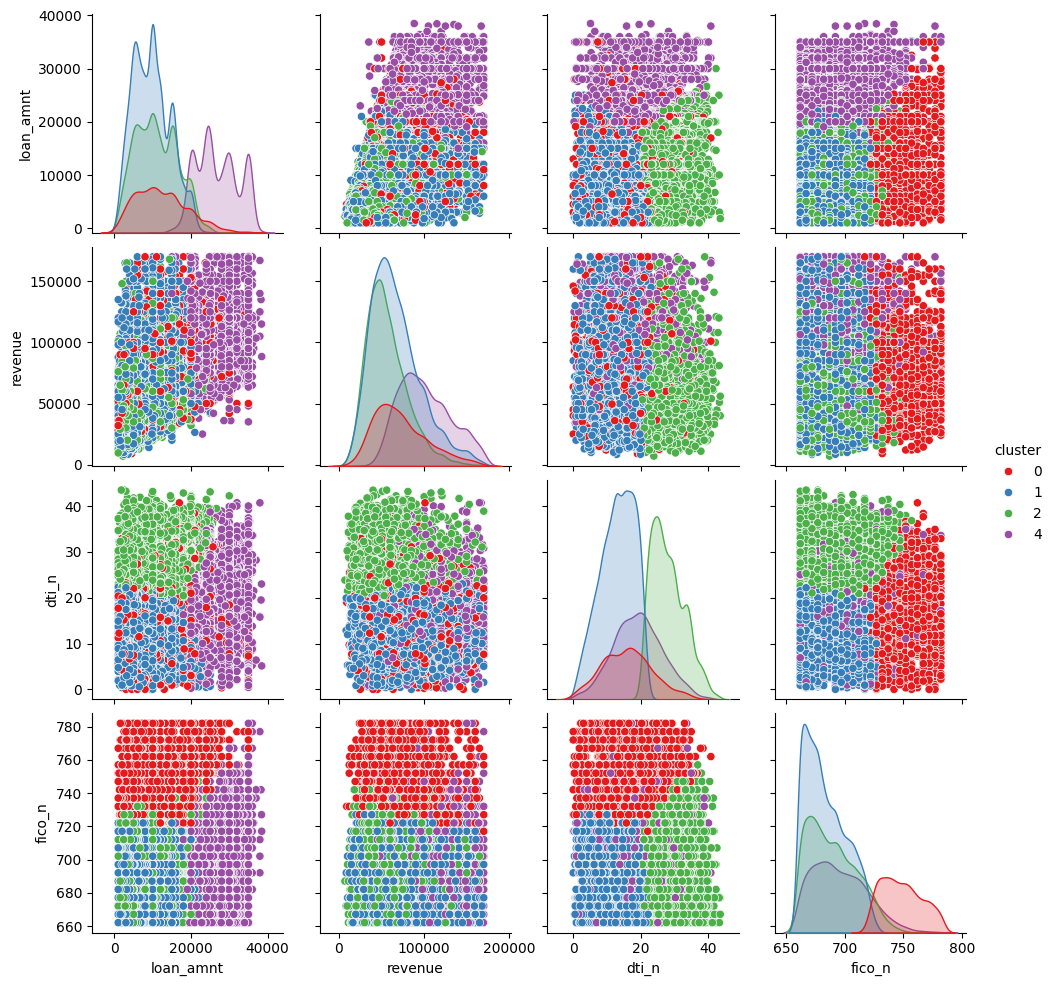

In [30]:
# Se filtran valores atipicos
df_filtrado1 = filtrar_atipicos(df, ['loan_amnt', 'revenue', 'dti_n', 'fico_n'])

# Se crean las gráficas por clusters
sns.pairplot(df_filtrado1, vars=['loan_amnt', 'revenue', 'dti_n', 'fico_n'], hue='cluster', palette='Set1')
plt.show()

Como se puede observar, eliminando los valores atípicos hay un cluster que desaparece por completo del diagrama: el cluster 3. Esto se debe a que la filtración es muy fuerte si se hace respecto al total: al calcular el rango intercuartílico de la muestra en general y haber clasificado los individuos en clusters previamente, la mayoría de outliners han sido agrupados en el mismo cluster, con lo que eliminarlos hace que el cluster no aparezca.

In [31]:
print("Conteo de clusters antes del filtrado:")
print(df['cluster'].value_counts())

print("\nConteo de clusters después del filtrado:")
print(df_filtrado1['cluster'].value_counts())


Conteo de clusters antes del filtrado:
cluster
1    4993
2    3647
4    2872
0    1981
3     301
Name: count, dtype: int64

Conteo de clusters después del filtrado:
cluster
1    4947
2    3553
4    2619
0    1621
Name: count, dtype: int64


Si se comprueba el número de datos antes y después de filtrarlos vemos como además el cluster 3 cuenta con muy pocos datos  desde un principio y, después de filtrar, desaparece.

Esto puede evitarse haciendo que la filtración sea algo más suave y eliminando los valores que se consideran atípicos dentro del propio cluster, calculando el rango entre los individuos que pertenecen al mismo grupo:

In [32]:
# Función para eliminar atípicos basada en el IQR por clusters
def filtrar_atipicos_cluster(df, columns): 
    df_filtrado = df.copy()
    for cluster in df['cluster'].unique():
        df_cluster = df[df['cluster'] == cluster]
        for col in columns:
            Q1 = np.percentile(df_cluster[col], 25)
            Q3 = np.percentile(df_cluster[col], 75)
            IQR = Q3 - Q1
            abajo = Q1 - 1.5 * IQR
            arriba = Q3 + 1.5 * IQR
            df_filtrado = df_filtrado[~((df_filtrado['cluster'] == cluster) & 
                                        ((df_filtrado[col] < abajo) | (df_filtrado[col] > arriba)))]
    return df_filtrado

In [40]:
print("Conteo de clusters antes del filtrado:")
print(df['cluster'].value_counts())

# Se filtran valores atipicos
df_filtrado2 = filtrar_atipicos_cluster(df, ['loan_amnt', 'revenue', 'dti_n', 'fico_n'])
print("\nConteo de clusters después del filtrado:")
print(df_filtrado2['cluster'].value_counts())


Conteo de clusters antes del filtrado:
cluster
1    4993
2    3647
4    2872
0    1981
3     301
Name: count, dtype: int64

Conteo de clusters después del filtrado:
cluster
1    4832
2    3458
4    2820
0    1865
3     263
Name: count, dtype: int64


Tal y como se hizo antes, se observa la cantidad de datos que pertenecen a cada cluster con este nuevo filtrado.

Una vez filtrado, al tener los 5 clusters y evitar que desaparezca el tercero, se ha hecho el análisis sobre esta muestra:

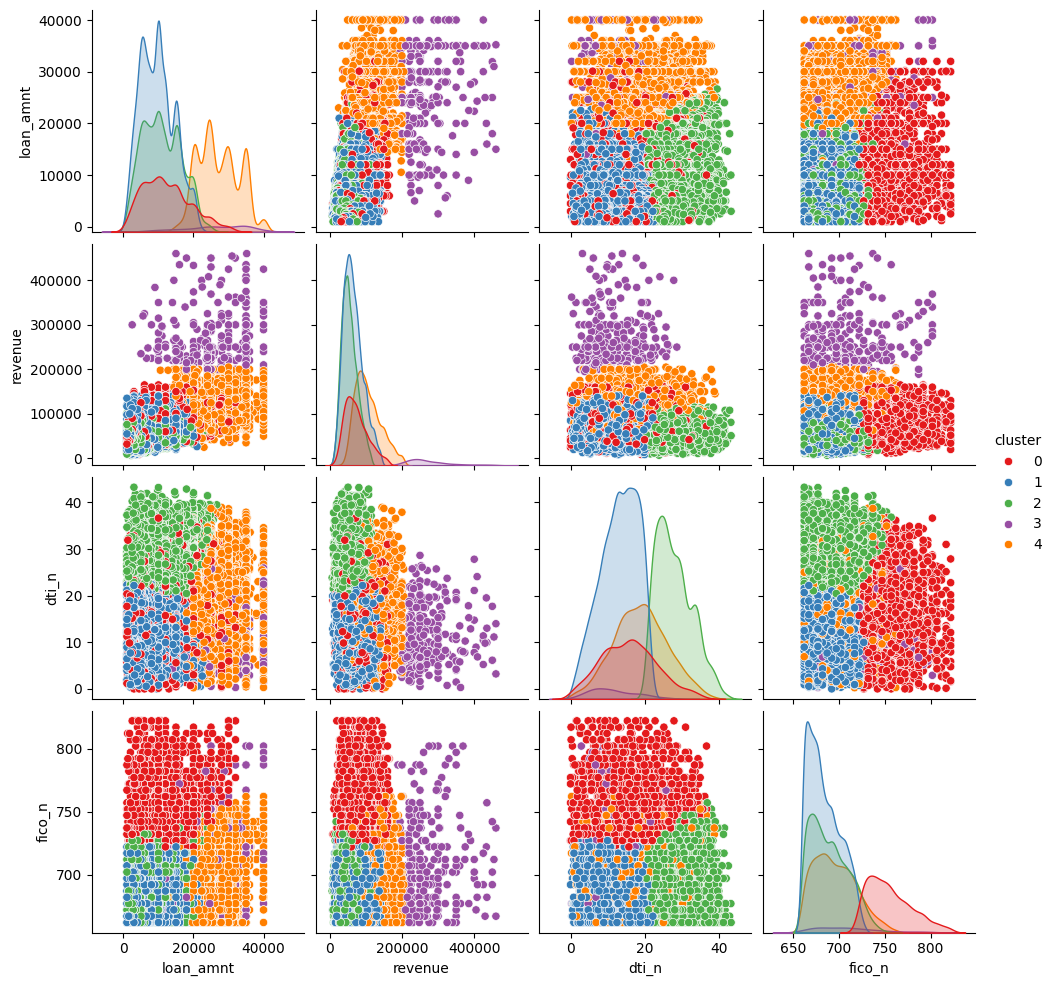

In [33]:
# Se filtran valores atipicos
df_filtrado2 = filtrar_atipicos_cluster(df, ['loan_amnt', 'revenue', 'dti_n', 'fico_n'])

# Se crean las gráficas por clusters
sns.pairplot(df_filtrado2, vars=['loan_amnt', 'revenue', 'dti_n', 'fico_n'], hue='cluster', palette='Set1')
plt.show()

Tras estas consideraciones, se puede hacer un mejor análisis por pares de variables:

- `loan_amnt - revenue`:

    - El cluster 3 tiene los valores más altos de ingresos y para el cluster 4 se ve como los ingresos son más bajos pero aún son altos. En ambos casos se ve como los datos están muy dispersos en cuanto a la cantidad del préstamo, siendo los únicos clusters que contienen préstamos de cantidades muy elevadas. Se refuerza entonces la teoría de que los individuos capaces de solicitar un préstamo muy grande son aquellos que tienen altos ingresos.
    - El resto de clusters tienden a concentrarse en la zona del diagrama que representa más bajos ingresos y préstamos pequeños o de una cantidad media, sin llegar a los valores tan elevados de los clusters anteriores.

- `loan_amnt - dti_n`:

    - El cluster 2 muestra una relación entre cantidad de préstamo media y un alto ratio de deuda, indicando clientes altamente endeudados. Mientras que el cluster 1 muestra individuos con una cantidad de préstamo similar a la del grupo anterior pero que están menos endeudados.
    - Para el cluster 4 se tiene un ratio de endeudamiento muy disperso para cantidades altas de préstamos.
    - Se dificulta la visualización de los clusters 0 y 3 pero sus datos parecen estar muy dispersos sin una relación clara entre estas variables. Se puede intuir, además que por lo dicho anteriormente, que el cluster 3 representa préstamos de cantidades en general más elevadas que el 0 pero no están agrupados alrededor de un rango de dti_n.

- `loan_amnt - fico_n`:

    - Los clusters 1 y 2 parecen muy similares en cuanto a su relación en estas variables. Ambos representan cantidades de préstamos bajas-medias con una solvencia también baja-media. Para el cluster 0, se tienen cantidades parecidas a las de los grupos anteriores aunque su fico_n es más alto en general.
    - El cluster 4 engloba individuos con préstamos mucho más altos y, sin embargo, una solvencia más baja que la que representaba el cluster 0.
    - El cluster 3 aparece muy disperso en el rango de cantidades de préstamos altas por lo que no tiene demasiada relación entre estas dos variables.
- `revenue - dti_n`:

    - Para un mismo rango de ingresos tenemos los clusters 1 y 2, donde el cluster 1 engloba individuos con baja tasa de endeudamiento, mientras que el 2 contiene préstamos marcados con un endeudamiento alto.
    - En unos ingresos algo más altos se sitúan los datos del cluster 4 que presentan un endeudamiento muy variado.
    - Para el cluster 3, que como se dijo anteriormente representaba individuos con altos ingresos, se tiene un endeudamiento en general bajo, lo que resulta lógico.
    - El que peor se distingue es el cluster 0, que se sitúa en el rango de ingresos de los clusters 1 y 2 pero tiene una tasa de endeudamiento muy dispersa.

- `revenue - fico_n`:

    - Para los clusters 1 y 2, se tiene una solvencia baja-media para un rango de ingresos bajos, que como se veía, es muy similar para ambos grupos. En contraposición, aparece el cluster 0, que a pesar de presentar unos ingresos similares a los clusters anteriores, engloba a préstamos cuyos solicitantes se considera tienen una solvencia elevada.
    - Aparecen con más ingresos el cluster 4 y, con ingresos aún más elevados, el cluster 3 aunque, a pesar de esto, en general muestran una solvencia más cercana a la de los clusters 1 y 2 (media-baja).

- `dti_n - fico_n`:

    - Como se viene expresando, los cluster 1 y 2 presentan una solvencia similar y, es este diagrama, se obtiene que su tasa de endeudamiento es muy diferente: el cluster 1 engloba individuos con tasa de endeudamiento baja, mientras que el cluster 2 parece incluir individuos con tasa de endeudamiento más alta.
    - Para representar una solvencia más alta aparece el cluster 0 que, sin embargo, tiene una tasa de endeudamiento muy dispersa sin una relación clara.
    - Los clusters 3 y 4 tienen una de endeudamiento muy dispersa, representando el primero una mayor solvencia.

<span style="font-family: 'Verdana'; font-size: 16px; font-weight: bold;">Dendrograma</span>

Por último, se han generado dos dendrogramas donde se indica la distancia a la que se encuentran los 5 clusters que se consideraron anteriormente: uno cogiendo la muestra original y el segundo con la muestra filtrada sobre la que se ha hecho el análisis.

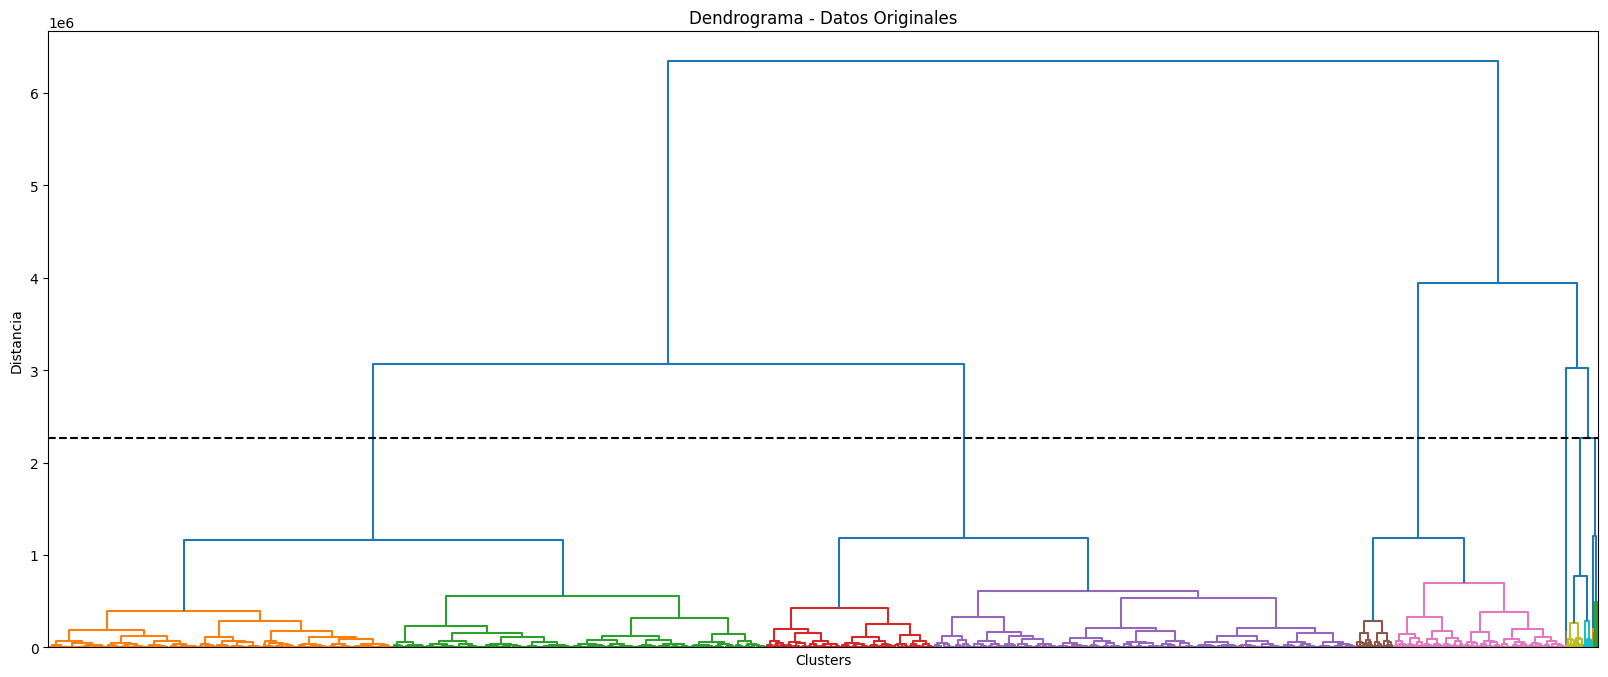

In [49]:
import scipy.cluster.hierarchy as sch

# Seleccionar los datos numéricos
variables = ['loan_amnt', 'revenue', 'dti_n', 'fico_n']
df_original = df[variables]

# Se calcula la matriz de distancias
Z = sch.linkage(df_original, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(20, 8))
sch.dendrogram(Z, no_labels=True, color_threshold=Z[-10, 2])  
plt.axhline(y=Z[-5, 2], color='black', linestyle='--')
plt.title("Dendrograma - Datos Originales")
plt.xlabel("Clusters")
plt.ylabel("Distancia")
plt.show()

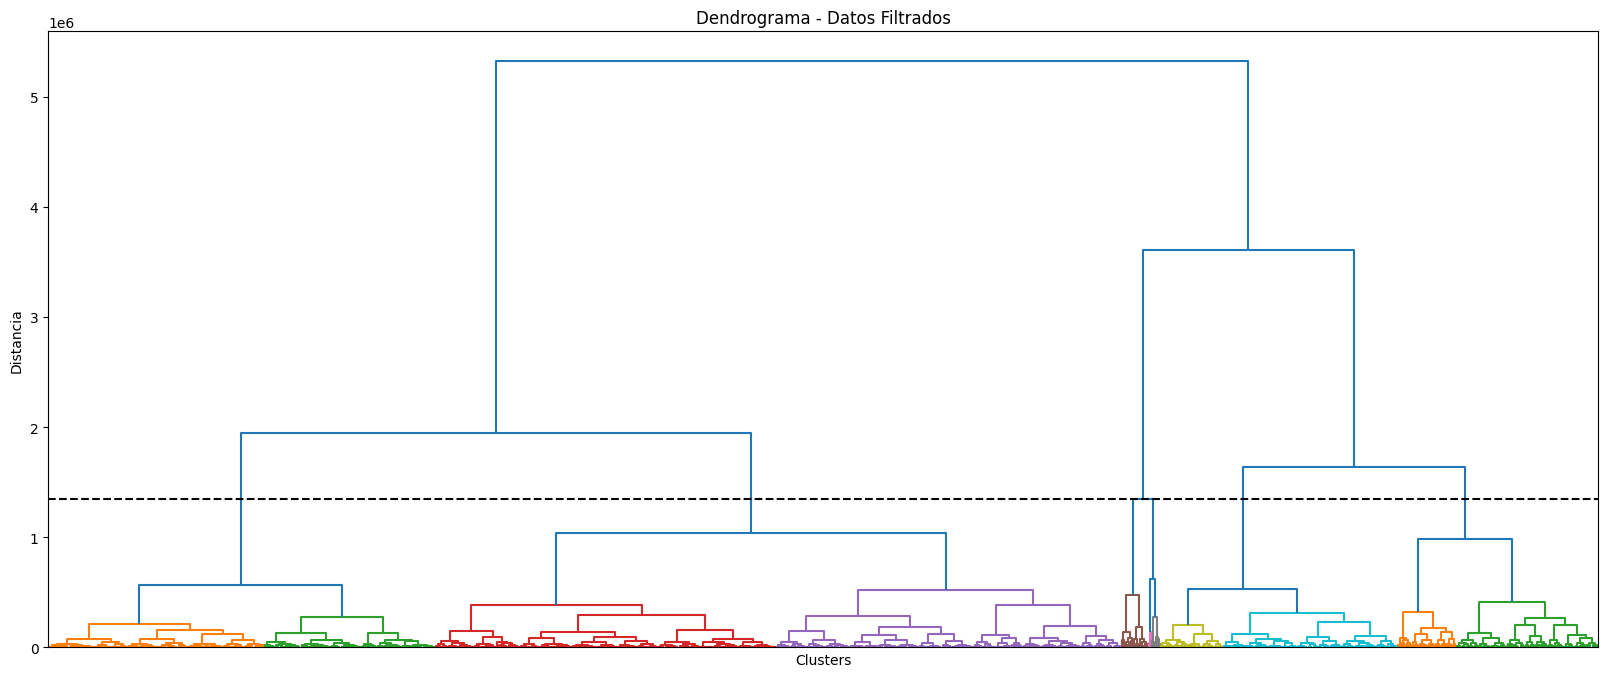

In [ ]:
# Se filtran los datos por clusters para quitar valores atípicos
X_filtrado = df_filtrado2[variables]

# Se calcula la matriz de distancias 
Z = sch.linkage(X_filtrado, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(20, 8)) 
sch.dendrogram(Z, no_labels=True, color_threshold=Z[-10, 2])  
plt.axhline(y=Z[-5, 2], color='black', linestyle='--')
plt.title("Dendrograma - Datos Filtrados")
plt.xlabel("Clusters")
plt.ylabel("Distancia")
plt.show()

Con estas representaciones se obtiene que la separación en 5 clusters se da a cierta distancia:

- `Dendrograma original`: se encuentran los 5 clusters a algo más de distancia 2.

- `Dendrograma filtrado`: la separación en los 5 clusters se tiene a un poco más de distancia 1.

Esta diferencia se debe a que el filtrado hace que los datos sean algo más homogéneos y haya menos ruido en la muestra, lo que provoca que los clusters se formen más cerca unos de otros por tener menores distancias entre puntos.